In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from matplotlib import rc
import pandas as pd

# Ag13

In [105]:
cd ..

/Users/esteban/quantumEspresso


In [106]:
cd ag13/dos2

/Users/esteban/quantumEspresso/ag13/dos2


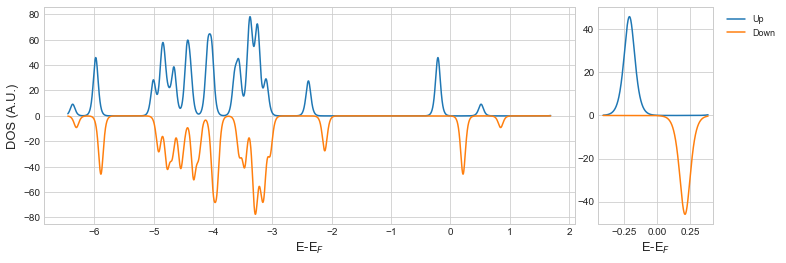

magnetización total cluster Ag13:  4.99479727 ±


In [124]:
mag = np.loadtxt('ag13.dos')
mag = mag[mag[:,0]<-2]

mag[:,0] = mag[:,0]+3.688
fig = plt.figure()

ax0 = plt.subplot2grid((1, 5), (0, 0), colspan=4, label="Up")
ax1 = plt.subplot2grid((1, 5), (0, 4), colspan=1, label="Down")

ax0.set_xlabel(r"E-E$_{F}$",fontsize=13)
ax0.set_ylabel(r"DOS (A.U.)",fontsize=13)

ax0.plot(mag[:,0],mag[:,1])
ax0.plot(mag[:,0],-mag[:,2])

mag_ = mag[mag[:,0]<0.388]
mag_ = mag_[mag_[:,0]>-0.412]

ax1.plot(mag_[:,0],mag_[:,1], label="Up")
ax1.plot(mag_[:,0],-mag_[:,2],label="Down")

ax1.set_xlabel(r"E-E$_{F}$",fontsize=13)

plt.legend(loc='upper left', fontsize=9, bbox_to_anchor=(1.05, 1.0))
fig.set_size_inches(12, 4)
plt.show()

mag_ = mag_[mag_[:,0]<0]

print('magnetización total cluster Ag13: ', mag_[:,1].sum()*0.001, '±' )

# Atomo Lateral de Ag13

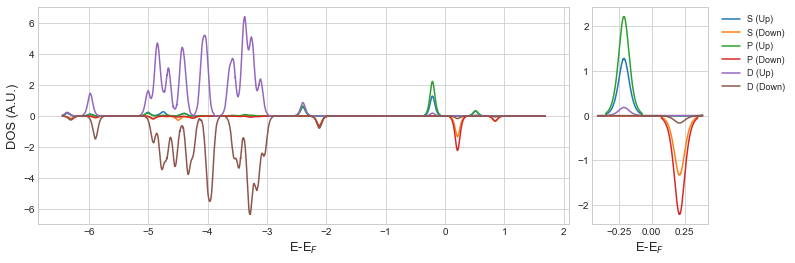

total magnetización átomo lateral cluster Ag13:  0.39664978999999995


In [126]:
temp1 = np.loadtxt('ag13.dos.pdos_atm#2(Ag)_wfc#1(s)')

mag_s = temp1[:,[0]]
mag_s = np.append(mag_s, temp1[:,[1]], axis=1)
mag_s = np.append(mag_s, temp1[:,[2]], axis=1)

temp1 = np.loadtxt('ag13.dos.pdos_atm#2(Ag)_wfc#2(p)')

mag_p = temp1[:,[0]]
mag_p = np.append(mag_p, temp1[:,[1]], axis=1)
mag_p = np.append(mag_p, temp1[:,[2]], axis=1)

temp1 = np.loadtxt('ag13.dos.pdos_atm#2(Ag)_wfc#3(d)')

mag_d = temp1[:,[0]]
mag_d = np.append(mag_d, temp1[:,[1]], axis=1)
mag_d = np.append(mag_d, temp1[:,[2]], axis=1)


fig = plt.figure()


mag_s = mag_s[mag_s[:,0]<-2]
mag_p = mag_p[mag_p[:,0]<-2]
mag_d = mag_d[mag_d[:,0]<-2]

mag_s[:,0] = mag_s[:,0] + 3.688
mag_p[:,0] = mag_p[:,0] + 3.688
mag_d[:,0] = mag_d[:,0] + 3.688


ax0 = plt.subplot2grid((1, 5), (0, 0), colspan=4)
ax1 = plt.subplot2grid((1, 5), (0, 4), colspan=1)

ax0.set_xlabel(r"E-E$_{F}$",fontsize=13)
ax0.set_ylabel(r"DOS (A.U.)",fontsize=13)


ax0.plot(mag_s[:,0],mag_s[:,1], label="S (Up)")
ax0.plot(mag_s[:,0],-mag_s[:,2],label="S (Down)")
ax0.plot(mag_p[:,0],mag_p[:,1], label="P (Up)")
ax0.plot(mag_p[:,0],-mag_p[:,2], label="P (Down)")
ax0.plot(mag_d[:,0],mag_d[:,1], label="D (Up)")
ax0.plot(mag_d[:,0],-mag_d[:,2], label="D (Down)")


mag_s = mag_s[mag_s[:,0]>-0.412]
mag_s = mag_s[mag_s[:,0]<0.388]

mag_p = mag_p[mag_p[:,0]>-0.412]
mag_p = mag_p[mag_p[:,0]<0.388]

mag_d = mag_d[mag_d[:,0]>-0.412]
mag_d = mag_d[mag_d[:,0]<0.388]


ax1.plot(mag_s[:,0],mag_s[:,1], label="S (Up)")
ax1.plot(mag_s[:,0],-mag_s[:,2],label="S (Down)")
ax1.plot(mag_p[:,0],mag_p[:,1], label="P (Up)")
ax1.plot(mag_p[:,0],-mag_p[:,2], label="P (Down)")
ax1.plot(mag_d[:,0],mag_d[:,1], label="D (Up)")
ax1.plot(mag_d[:,0],-mag_d[:,2], label="D (Down)")

ax1.set_xlabel(r"E-E$_{F}$",fontsize=13)

plt.legend(loc='upper left', fontsize=9, bbox_to_anchor=(1.05, 1.0))
fig.set_size_inches(12, 4)
plt.show()

print('total magnetización átomo lateral cluster Ag13: ',(mag_s[:,1]+mag_p[:,1]+mag_d[:,1]).sum()*0.001)

# Átomo Central de Ag13

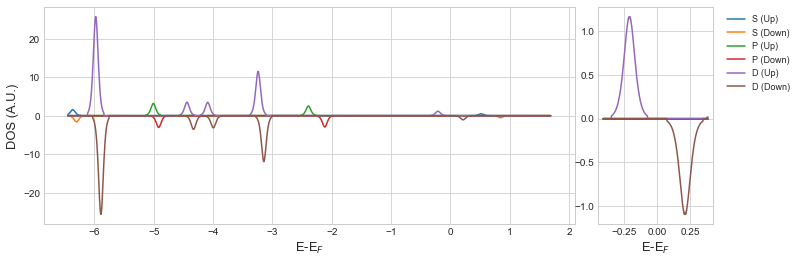

total magnetización átomo central cluster Ag13:  0.124760926037158


In [127]:
temp1 = np.loadtxt('ag13.dos.pdos_atm#8(Ag)_wfc#1(s)')

mag_s = temp1[:,[0]]
mag_s = np.append(mag_s, temp1[:,[1]], axis=1)
mag_s = np.append(mag_s, temp1[:,[2]], axis=1)

temp1 = np.loadtxt('ag13.dos.pdos_atm#8(Ag)_wfc#2(p)')

mag_p = temp1[:,[0]]
mag_p = np.append(mag_p, temp1[:,[1]], axis=1)
mag_p = np.append(mag_p, temp1[:,[2]], axis=1)

temp1 = np.loadtxt('ag13.dos.pdos_atm#8(Ag)_wfc#3(d)')

mag_d = temp1[:,[0]]
mag_d = np.append(mag_d, temp1[:,[1]], axis=1)
mag_d = np.append(mag_d, temp1[:,[2]], axis=1)


fig = plt.figure()


mag_s = mag_s[mag_s[:,0]<-2]
mag_p = mag_p[mag_p[:,0]<-2]
mag_d = mag_d[mag_d[:,0]<-2]

mag_s[:,0] = mag_s[:,0] + 3.688
mag_p[:,0] = mag_p[:,0] + 3.688
mag_d[:,0] = mag_d[:,0] + 3.688


ax0 = plt.subplot2grid((1, 5), (0, 0), colspan=4)
ax1 = plt.subplot2grid((1, 5), (0, 4), colspan=1)

ax0.set_xlabel(r"E-E$_{F}$",fontsize=13)
ax0.set_ylabel(r"DOS (A.U.)",fontsize=13)


ax0.plot(mag_s[:,0],mag_s[:,1], label="S (Up)")
ax0.plot(mag_s[:,0],-mag_s[:,2],label="S (Down)")
ax0.plot(mag_p[:,0],mag_p[:,1], label="P (Up)")
ax0.plot(mag_p[:,0],-mag_p[:,2], label="P (Down)")
ax0.plot(mag_d[:,0],mag_d[:,1], label="D (Up)")
ax0.plot(mag_d[:,0],-mag_d[:,2], label="D (Down)")

mag_s = mag_s[mag_s[:,0]>-0.412]
mag_s = mag_s[mag_s[:,0]<0.388]

mag_p = mag_p[mag_p[:,0]>-0.412]
mag_p = mag_p[mag_p[:,0]<0.388]

mag_d = mag_d[mag_d[:,0]>-0.412]
mag_d = mag_d[mag_d[:,0]<0.388]

ax1.plot(mag_s[:,0],mag_s[:,1], label="S (Up)")
ax1.plot(mag_s[:,0],-mag_s[:,2],label="S (Down)")
ax1.plot(mag_p[:,0],mag_p[:,1], label="P (Up)")
ax1.plot(mag_p[:,0],-mag_p[:,2], label="P (Down)")
ax1.plot(mag_d[:,0],mag_d[:,1], label="D (Up)")
ax1.plot(mag_d[:,0],-mag_d[:,2], label="D (Down)")

ax1.set_xlabel(r"E-E$_{F}$",fontsize=13)


plt.legend(loc='upper left', fontsize=9, bbox_to_anchor=(1.05, 1.0))
fig.set_size_inches(12, 4)
plt.show()

print('total magnetización átomo central cluster Ag13: ',(mag_s[:,1]+mag_p[:,1]+mag_d[:,1]).sum()*0.001)

# Ag12Bic

In [129]:
cd ../..

/Users/esteban/quantumEspresso


In [130]:
cd ag12bic/dos

/Users/esteban/quantumEspresso/ag12bic/dos


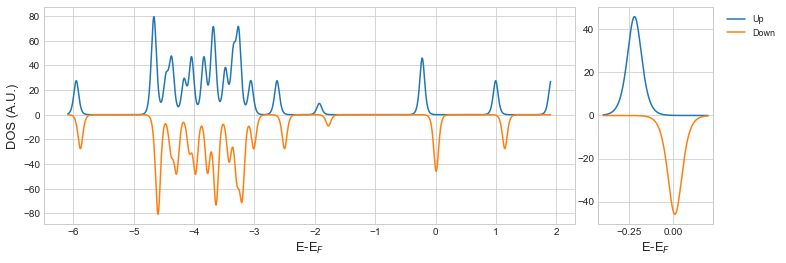

total magnetización del cluster Ag12Bic:  2.9870365954186013


In [133]:
mag = np.loadtxt('ag12Bic.dos')
mag = mag[mag[:,0]<-2]
mag = mag[mag[:,0]>-10]

mag[:,0] = mag[:,0]+3.908

fig = plt.figure()

ax0 = plt.subplot2grid((1, 5), (0, 0), colspan=4, label="Up")
ax1 = plt.subplot2grid((1, 5), (0, 4), colspan=1, label="Down")

ax0.set_xlabel(r"E-E$_{F}$",fontsize=13)
ax0.set_ylabel(r"DOS (A.U.)",fontsize=13)

ax0.plot(mag[:,0],mag[:,1])
ax0.plot(mag[:,0],-mag[:,2])

mag_ = mag[mag[:,0]<0.2]
mag_ = mag_[mag_[:,0]>-0.4]

ax1.plot(mag_[:,0],mag_[:,1], label="Up")
ax1.plot(mag_[:,0],-mag_[:,2],label="Down")

ax1.set_xlabel(r"E-E$_{F}$",fontsize=13)

plt.legend(loc='upper left', fontsize=9, bbox_to_anchor=(1.05, 1.0))
fig.set_size_inches(12, 4)
plt.show()

mag_ = mag[mag[:,0]<0]

print('total magnetización del cluster Ag12Bic: ', mag_[:,1].sum()*0.001-mag_[:,2].sum()*0.001)

# Átomo Lateral

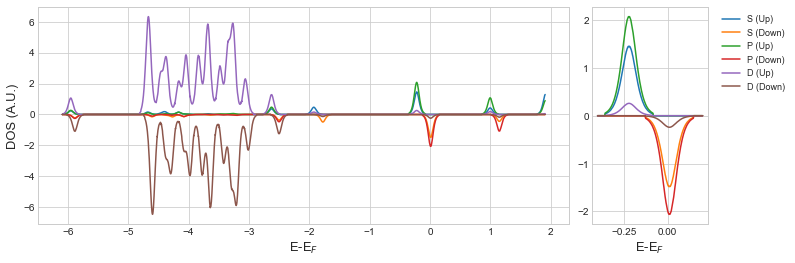

total magnetización átomo lateral del cluster Ag12Bic:  0.24472425999999997


In [134]:
temp1 = np.loadtxt('ag12Bic.dos.pdos_atm#2(Ag)_wfc#1(s)')

mag_s = temp1[:,[0]]
mag_s = np.append(mag_s, temp1[:,[1]], axis=1)
mag_s = np.append(mag_s, temp1[:,[2]], axis=1)

temp1 = np.loadtxt('ag12Bic.dos.pdos_atm#2(Ag)_wfc#2(p)')

mag_p = temp1[:,[0]]
mag_p = np.append(mag_p, temp1[:,[1]], axis=1)
mag_p = np.append(mag_p, temp1[:,[2]], axis=1)

temp1 = np.loadtxt('ag12Bic.dos.pdos_atm#2(Ag)_wfc#3(d)')

mag_d = temp1[:,[0]]
mag_d = np.append(mag_d, temp1[:,[1]], axis=1)
mag_d = np.append(mag_d, temp1[:,[2]], axis=1)


fig = plt.figure()


mag_s = mag_s[mag_s[:,0]<-2]
mag_p = mag_p[mag_p[:,0]<-2]
mag_d = mag_d[mag_d[:,0]<-2]

mag_s = mag_s[mag_s[:,0]>-10]
mag_p = mag_p[mag_p[:,0]>-10]
mag_d = mag_d[mag_d[:,0]>-10]


mag_s[:,0] = mag_s[:,0] + 3.908
mag_p[:,0] = mag_p[:,0] + 3.908
mag_d[:,0] = mag_d[:,0] + 3.908

ax0 = plt.subplot2grid((1, 5), (0, 0), colspan=4)
ax1 = plt.subplot2grid((1, 5), (0, 4), colspan=1)

ax0.set_xlabel(r"E-E$_{F}$",fontsize=13)
ax0.set_ylabel(r"DOS (A.U.)",fontsize=13)


ax0.plot(mag_s[:,0],mag_s[:,1], label="S (Up)")
ax0.plot(mag_s[:,0],-mag_s[:,2],label="S (Down)")
ax0.plot(mag_p[:,0],mag_p[:,1], label="P (Up)")
ax0.plot(mag_p[:,0],-mag_p[:,2], label="P (Down)")
ax0.plot(mag_d[:,0],mag_d[:,1], label="D (Up)")
ax0.plot(mag_d[:,0],-mag_d[:,2], label="D (Down)")


mag_s = mag_s[mag_s[:,0]>-0.4]
mag_s = mag_s[mag_s[:,0]<0.2]

mag_p = mag_p[mag_p[:,0]>-0.4]
mag_p = mag_p[mag_p[:,0]<0.2]

mag_d = mag_d[mag_d[:,0]>-0.4]
mag_d = mag_d[mag_d[:,0]<0.2]


ax1.plot(mag_s[:,0],mag_s[:,1], label="S (Up)")
ax1.plot(mag_s[:,0],-mag_s[:,2],label="S (Down)")
ax1.plot(mag_p[:,0],mag_p[:,1], label="P (Up)")
ax1.plot(mag_p[:,0],-mag_p[:,2], label="P (Down)")
ax1.plot(mag_d[:,0],mag_d[:,1], label="D (Up)")
ax1.plot(mag_d[:,0],-mag_d[:,2], label="D (Down)")

ax1.set_xlabel(r"E-E$_{F}$",fontsize=13)

plt.legend(loc='upper left', fontsize=9, bbox_to_anchor=(1.05, 1.0))
fig.set_size_inches(12, 4)
plt.show()

mag_s = mag_s[mag_s[:,0]<0]
mag_p = mag_p[mag_p[:,0]<0]
mag_d = mag_d[mag_d[:,0]<0]

print('total magnetización átomo lateral del cluster Ag12Bic: ', (mag_s[:,1]+mag_p[:,1]+mag_d[:,1]).sum()*0.001-(mag_s[:,2]+mag_p[:,2]+mag_d[:,2]).sum()*0.001)

## Átomo Central

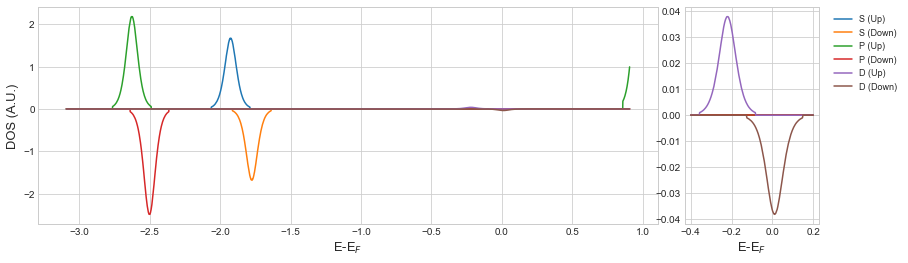

total magnetización átomo central del cluster Ag12Bic:  0.0024511849768104003


In [135]:
temp1 = np.loadtxt('ag12Bic.dos.pdos_atm#8(Bi)_wfc#1(s)')

mag_s = temp1[:,[0]]
mag_s = np.append(mag_s, temp1[:,[1]], axis=1)
mag_s = np.append(mag_s, temp1[:,[2]], axis=1)

temp1 = np.loadtxt('ag12Bic.dos.pdos_atm#8(Bi)_wfc#2(p)')

mag_p = temp1[:,[0]]
mag_p = np.append(mag_p, temp1[:,[1]], axis=1)
mag_p = np.append(mag_p, temp1[:,[2]], axis=1)

temp1 = np.loadtxt('ag12Bic.dos.pdos_atm#8(Bi)_wfc#3(d)')

mag_d = temp1[:,[0]]
mag_d = np.append(mag_d, temp1[:,[1]], axis=1)
mag_d = np.append(mag_d, temp1[:,[2]], axis=1)


fig = plt.figure()


mag_s = mag_s[mag_s[:,0]<-3]
mag_p = mag_p[mag_p[:,0]<-3]
mag_d = mag_d[mag_d[:,0]<-3]

mag_s = mag_s[mag_s[:,0]>-7]
mag_p = mag_p[mag_p[:,0]>-7]
mag_d = mag_d[mag_d[:,0]>-7]

mag_s[:,0] = mag_s[:,0] + 3.908
mag_p[:,0] = mag_p[:,0] + 3.908
mag_d[:,0] = mag_d[:,0] + 3.908


ax0 = plt.subplot2grid((1, 5), (0, 0), colspan=4)
ax1 = plt.subplot2grid((1, 5), (0, 4), colspan=1)


ax0.set_xlabel(r"E-E$_{F}$",fontsize=13)
ax0.set_ylabel(r"DOS (A.U.)",fontsize=13)

ax0.plot(mag_s[:,0],mag_s[:,1], label="S (Up)")
ax0.plot(mag_s[:,0],-mag_s[:,2],label="S (Down)")
ax0.plot(mag_p[:,0],mag_p[:,1], label="P (Up)")
ax0.plot(mag_p[:,0],-mag_p[:,2], label="P (Down)")
ax0.plot(mag_d[:,0],mag_d[:,1], label="D (Up)")
ax0.plot(mag_d[:,0],-mag_d[:,2], label="D (Down)")


mag_s = mag_s[mag_s[:,0]>-0.4]
mag_s = mag_s[mag_s[:,0]<0.2]

mag_p = mag_p[mag_p[:,0]>-0.4]
mag_p = mag_p[mag_p[:,0]<0.2]

mag_d = mag_d[mag_d[:,0]>-0.4]
mag_d = mag_d[mag_d[:,0]<0.2]


ax1.plot(mag_s[:,0],mag_s[:,1], label="S (Up)")
ax1.plot(mag_s[:,0],-mag_s[:,2],label="S (Down)")
ax1.plot(mag_p[:,0],mag_p[:,1], label="P (Up)")
ax1.plot(mag_p[:,0],-mag_p[:,2], label="P (Down)")
ax1.plot(mag_d[:,0],mag_d[:,1], label="D (Up)")
ax1.plot(mag_d[:,0],-mag_d[:,2], label="D (Down)")

ax1.set_xlabel(r"E-E$_{F}$",fontsize=13)

plt.legend(loc='upper left', fontsize=9, bbox_to_anchor=(1.05, 1.0))
fig.set_size_inches(14, 4)
plt.show()

mag_s = mag_s[mag_s[:,0]<0]
mag_p = mag_p[mag_p[:,0]<0]
mag_d = mag_d[mag_d[:,0]<0]

print('total magnetización átomo central del cluster Ag12Bic: ', (mag_s[:,1]+mag_p[:,1]+mag_d[:,1]).sum()*0.001-(mag_s[:,2]+mag_p[:,2]+mag_d[:,2]).sum()*0.001)

# Ag12Bil

In [102]:
cd ..

/Users/esteban/quantumEspresso/ag12bic


In [103]:
cd Ag12bil

[Errno 2] No such file or directory: 'Ag12bil'
/Users/esteban/quantumEspresso/ag12bic


In [24]:
mag = np.loadtxt('ag12Bil.dos')
fig, ax = plt.subplots()
plt.plot(mag[:,0],mag[:,1])
plt.plot(mag[:,0],-mag[:,2])
fig.set_size_inches(30, 10)

OSError: ag12Bil.dos not found.

#Bismuto

In [ ]:
temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#10(Bi)_wfc#1(s)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#10(Bi)_wfc#2(s)')
mag_s = temp1[:,[0,3,4]]
mag_s[:,[1,2]] +=  temp2[:,[3,4]]

temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#10(Bi)_wfc#3(p)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#10(Bi)_wfc#4(p)')

mag_p = temp1[:,[0,3,4]]
mag_p[:,[1]] += (temp1[:,[5]] + temp1[:,[7]] + temp2[:,[3]] + temp2[:,[5]] + temp2[:,[7]])
mag_p[:,[2]] += (temp1[:,[6]] + temp1[:,[8]] + temp2[:,[4]] + temp2[:,[6]] + temp2[:,[8]])

temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#10(Bi)_wfc#5(d)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#10(Bi)_wfc#6(d)')

mag_d = temp1[:,[0,3,4]]
mag_d[:,[1]] += temp1[:,[5]] + temp1[:,[7]] + temp1[:,[9]] + temp1[:,[11]] + temp2[:,[3]] + temp2[:,[5]] + temp2[:,[7]] + temp2[:,[9]] + temp2[:,[11]]
mag_d[:,[2]] += temp1[:,[6]] + temp1[:,[8]] + temp1[:,[10]] + temp1[:,[12]] + temp2[:,[4]] + temp2[:,[6]] + temp2[:,[8]] + temp2[:,[10]] + temp2[:,[12]]

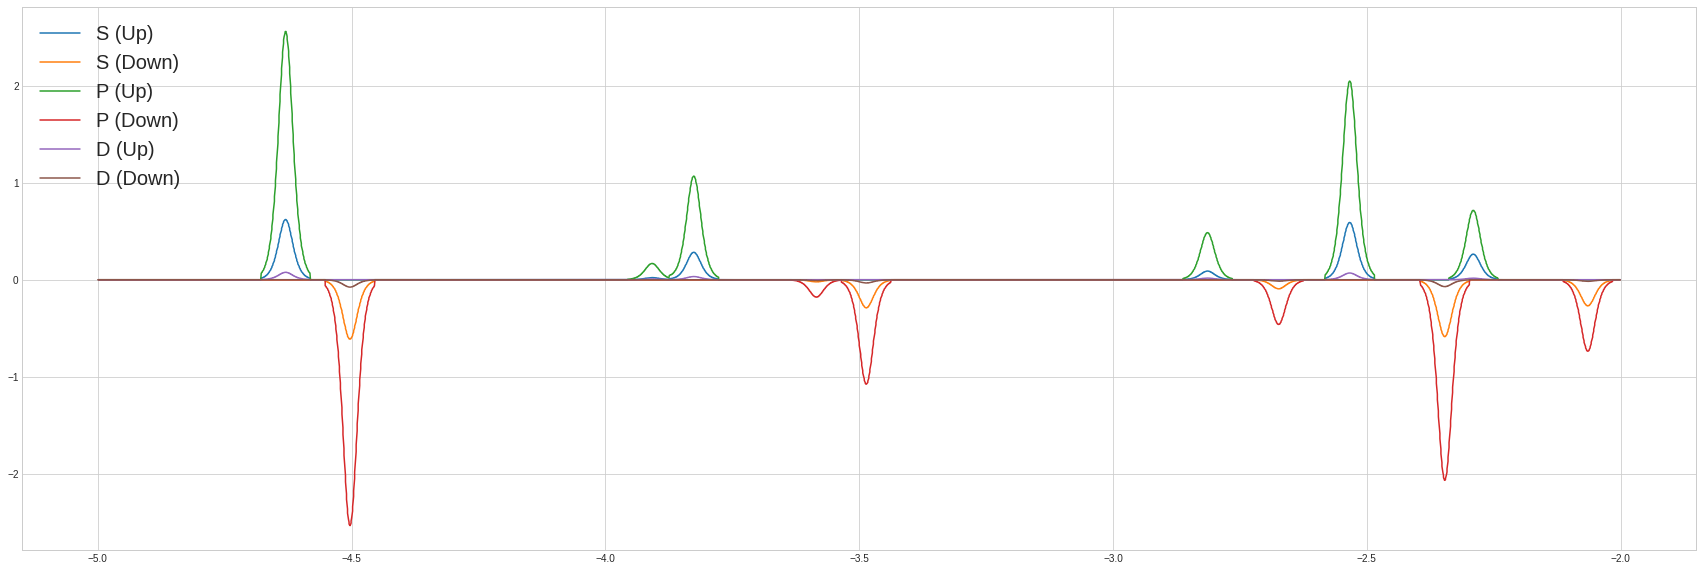

In [ ]:
mag_s = mag_s[mag_s[:,0]>-5]
mag_s = mag_s[mag_s[:,0]<-2]

mag_p = mag_p[mag_p[:,0]>-5]
mag_p = mag_p[mag_p[:,0]<-2]

mag_d = mag_d[mag_d[:,0]>-5]
mag_d = mag_d[mag_d[:,0]<-2]

fig, ax = plt.subplots()
plt.plot(mag_s[:,0],mag_s[:,1], label="S (Up)")
plt.plot(mag_s[:,0],-mag_s[:,2],label="S (Down)")
plt.plot(mag_p[:,0],mag_p[:,1], label="P (Up)")
plt.plot(mag_p[:,0],-mag_p[:,2], label="P (Down)")
plt.plot(mag_d[:,0],mag_d[:,1], label="D (Up)")
plt.plot(mag_d[:,0],-mag_d[:,2], label="D (Down)")
fig.set_size_inches(30, 10)
plt.legend(loc='upper left', fontsize=20)
plt.show()

#Primer Vecino

In [ ]:
temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#2(Ag)_wfc#1(s)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#2(Ag)_wfc#2(s)')
mag_s = temp1[:,[0,3,4]]
mag_s[:,[1,2]] +=  temp2[:,[3,4]]

temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#2(Ag)_wfc#3(p)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#2(Ag)_wfc#4(p)')

mag_p = temp1[:,[0,3,4]]
mag_p[:,[1]] += (temp1[:,[5]] + temp1[:,[7]] + temp2[:,[3]] + temp2[:,[5]] + temp2[:,[7]])
mag_p[:,[2]] += (temp1[:,[6]] + temp1[:,[8]] + temp2[:,[4]] + temp2[:,[6]] + temp2[:,[8]])

temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#2(Ag)_wfc#5(d)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#2(Ag)_wfc#6(d)')

mag_d = temp1[:,[0,3,4]]
mag_d[:,[1]] += temp1[:,[5]] + temp1[:,[7]] + temp1[:,[9]] + temp1[:,[11]] + temp2[:,[3]] + temp2[:,[5]] + temp2[:,[7]] + temp2[:,[9]] + temp2[:,[11]]
mag_d[:,[2]] += temp1[:,[6]] + temp1[:,[8]] + temp1[:,[10]] + temp1[:,[12]] + temp2[:,[4]] + temp2[:,[6]] + temp2[:,[8]] + temp2[:,[10]] + temp2[:,[12]]

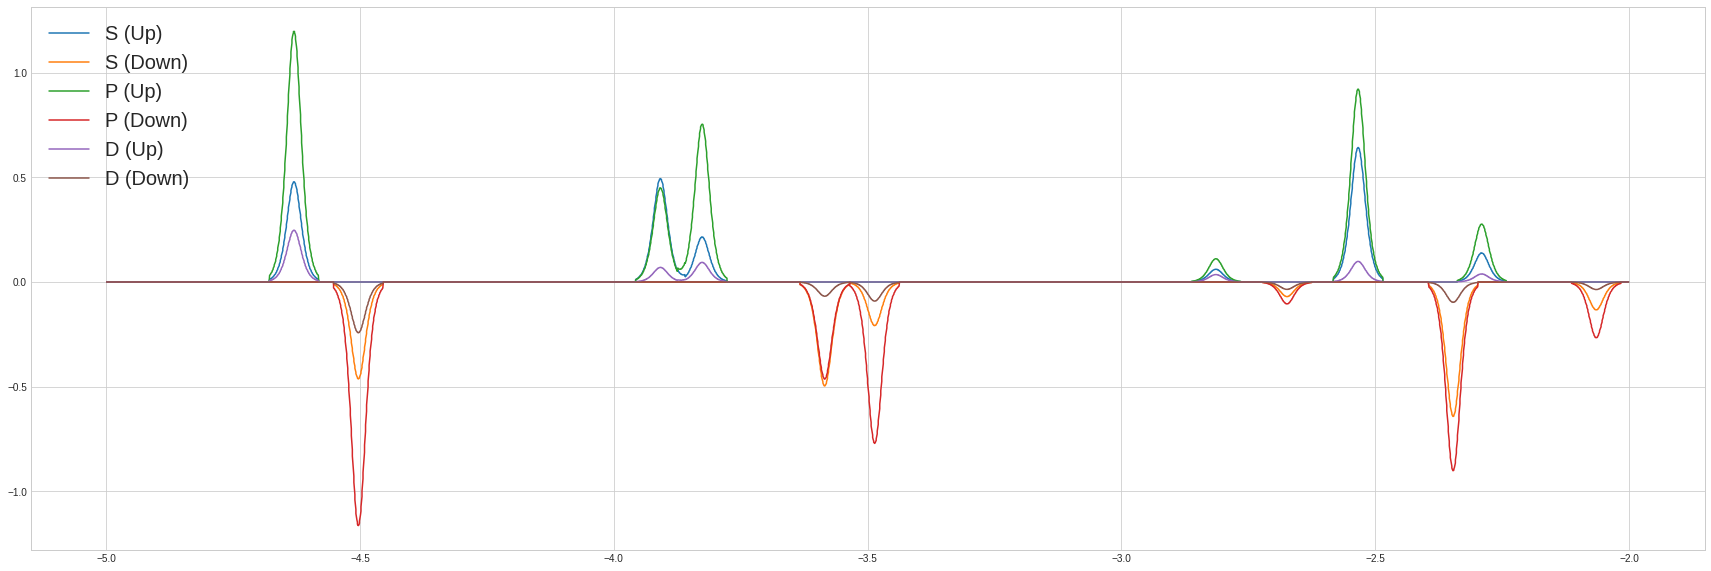

In [ ]:
mag_s = mag_s[mag_s[:,0]>-5]
mag_s = mag_s[mag_s[:,0]<-2]

mag_p = mag_p[mag_p[:,0]>-5]
mag_p = mag_p[mag_p[:,0]<-2]

mag_d = mag_d[mag_d[:,0]>-5]
mag_d = mag_d[mag_d[:,0]<-2]

fig, ax = plt.subplots()
plt.plot(mag_s[:,0],mag_s[:,1], label="S (Up)")
plt.plot(mag_s[:,0],-mag_s[:,2],label="S (Down)")
plt.plot(mag_p[:,0],mag_p[:,1], label="P (Up)")
plt.plot(mag_p[:,0],-mag_p[:,2], label="P (Down)")
plt.plot(mag_d[:,0],mag_d[:,1], label="D (Up)")
plt.plot(mag_d[:,0],-mag_d[:,2], label="D (Down)")
fig.set_size_inches(30, 10)
plt.legend(loc='upper left', fontsize=20)
plt.show()

#Segundo Vecino

In [ ]:
temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#5(Ag)_wfc#1(s)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#5(Ag)_wfc#2(s)')
mag_s = temp1[:,[0,3,4]]
mag_s[:,[1,2]] +=  temp2[:,[3,4]]

temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#5(Ag)_wfc#3(p)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#5(Ag)_wfc#4(p)')

mag_p = temp1[:,[0,3,4]]
mag_p[:,[1]] += (temp1[:,[5]] + temp1[:,[7]] + temp2[:,[3]] + temp2[:,[5]] + temp2[:,[7]])
mag_p[:,[2]] += (temp1[:,[6]] + temp1[:,[8]] + temp2[:,[4]] + temp2[:,[6]] + temp2[:,[8]])

temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#5(Ag)_wfc#5(d)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#5(Ag)_wfc#6(d)')

mag_d = temp1[:,[0,3,4]]
mag_d[:,[1]] += temp1[:,[5]] + temp1[:,[7]] + temp1[:,[9]] + temp1[:,[11]] + temp2[:,[3]] + temp2[:,[5]] + temp2[:,[7]] + temp2[:,[9]] + temp2[:,[11]]
mag_d[:,[2]] += temp1[:,[6]] + temp1[:,[8]] + temp1[:,[10]] + temp1[:,[12]] + temp2[:,[4]] + temp2[:,[6]] + temp2[:,[8]] + temp2[:,[10]] + temp2[:,[12]]

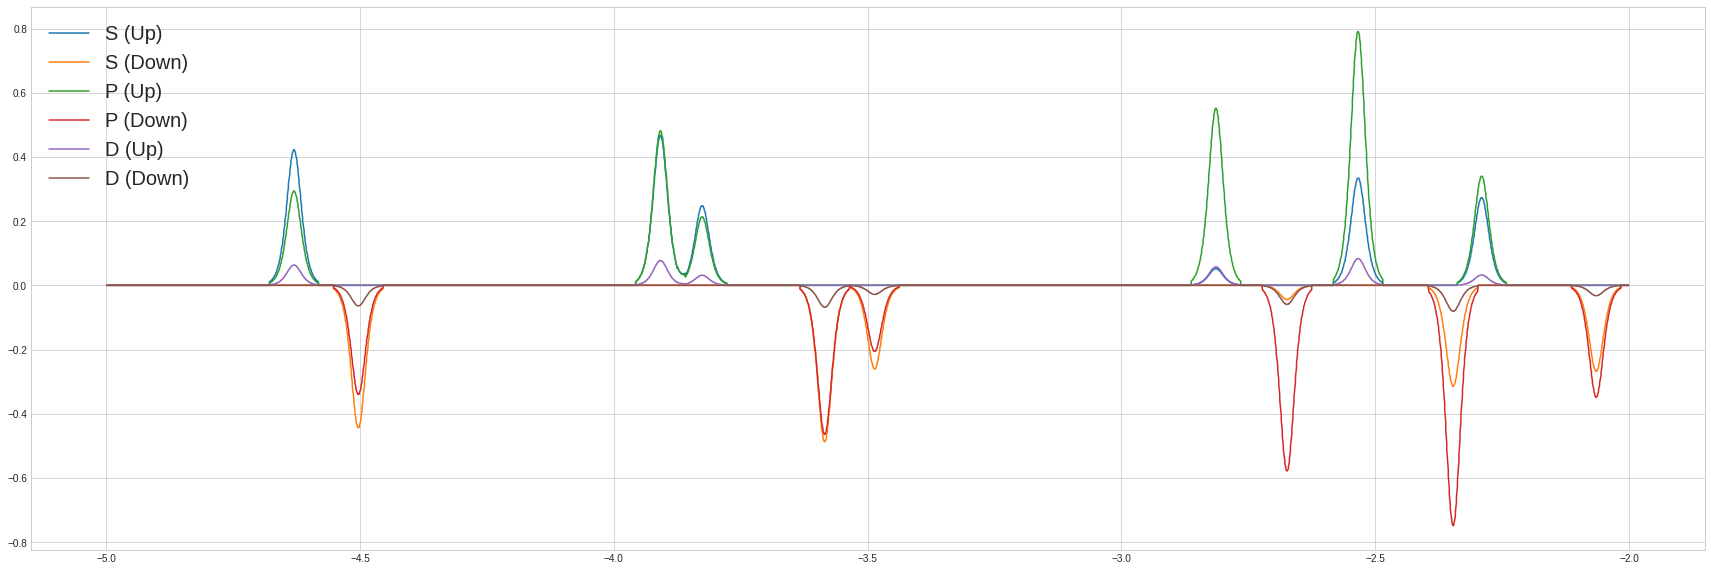

In [ ]:
mag_s = mag_s[mag_s[:,0]>-5]
mag_s = mag_s[mag_s[:,0]<-2]

mag_p = mag_p[mag_p[:,0]>-5]
mag_p = mag_p[mag_p[:,0]<-2]

mag_d = mag_d[mag_d[:,0]>-5]
mag_d = mag_d[mag_d[:,0]<-2]

fig, ax = plt.subplots()
plt.plot(mag_s[:,0],mag_s[:,1], label="S (Up)")
plt.plot(mag_s[:,0],-mag_s[:,2],label="S (Down)")
plt.plot(mag_p[:,0],mag_p[:,1], label="P (Up)")
plt.plot(mag_p[:,0],-mag_p[:,2], label="P (Down)")
plt.plot(mag_d[:,0],mag_d[:,1], label="D (Up)")
plt.plot(mag_d[:,0],-mag_d[:,2], label="D (Down)")
fig.set_size_inches(30, 10)
plt.legend(loc='upper left', fontsize=20)
plt.show()

#Lejano

In [ ]:
temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#7(Ag)_wfc#1(s)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#7(Ag)_wfc#2(s)')
mag_s = temp1[:,[0,3,4]]
mag_s[:,[1,2]] +=  temp2[:,[3,4]]

temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#7(Ag)_wfc#3(p)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#7(Ag)_wfc#4(p)')

mag_p = temp1[:,[0,3,4]]
mag_p[:,[1]] += (temp1[:,[5]] + temp1[:,[7]] + temp2[:,[3]] + temp2[:,[5]] + temp2[:,[7]])
mag_p[:,[2]] += (temp1[:,[6]] + temp1[:,[8]] + temp2[:,[4]] + temp2[:,[6]] + temp2[:,[8]])

temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#7(Ag)_wfc#5(d)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#7(Ag)_wfc#6(d)')

mag_d = temp1[:,[0,3,4]]
mag_d[:,[1]] += temp1[:,[5]] + temp1[:,[7]] + temp1[:,[9]] + temp1[:,[11]] + temp2[:,[3]] + temp2[:,[5]] + temp2[:,[7]] + temp2[:,[9]] + temp2[:,[11]]
mag_d[:,[2]] += temp1[:,[6]] + temp1[:,[8]] + temp1[:,[10]] + temp1[:,[12]] + temp2[:,[4]] + temp2[:,[6]] + temp2[:,[8]] + temp2[:,[10]] + temp2[:,[12]]

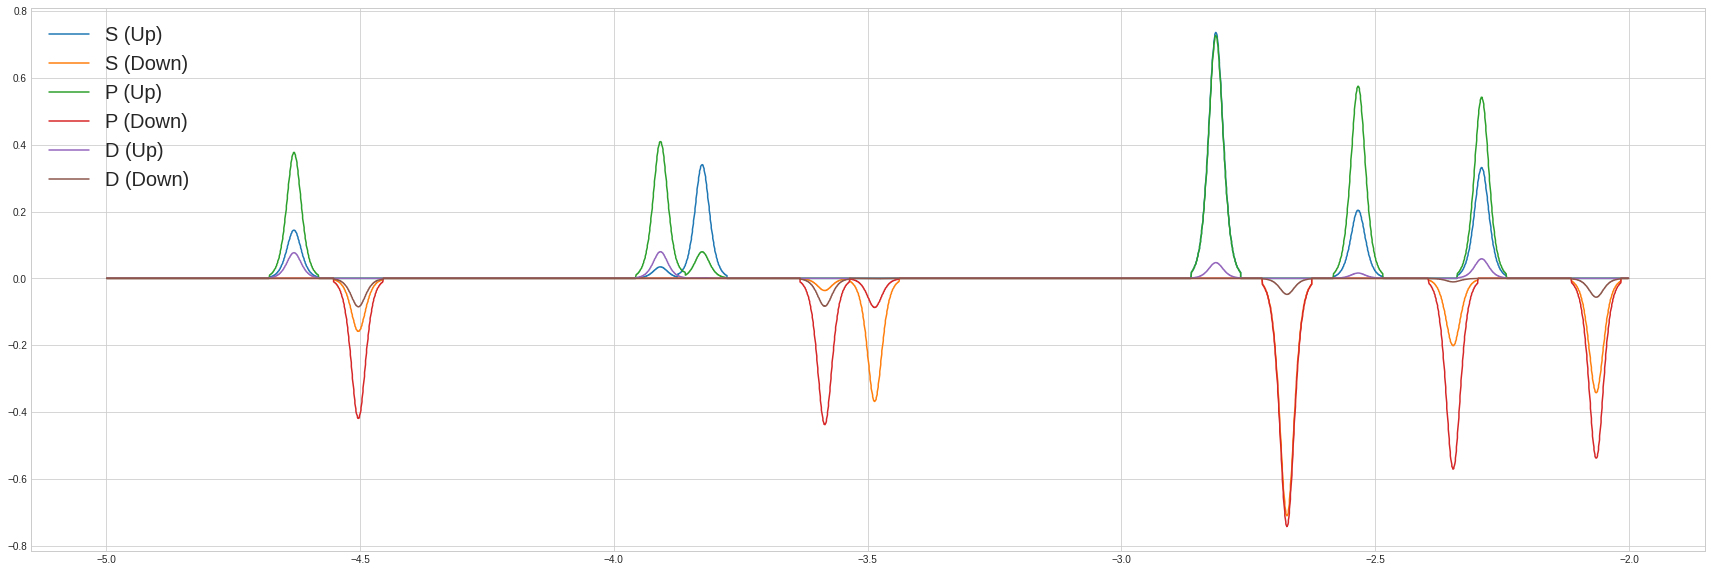

In [ ]:
mag_s = mag_s[mag_s[:,0]>-5]
mag_s = mag_s[mag_s[:,0]<-2]

mag_p = mag_p[mag_p[:,0]>-5]
mag_p = mag_p[mag_p[:,0]<-2]

mag_d = mag_d[mag_d[:,0]>-5]
mag_d = mag_d[mag_d[:,0]<-2]

fig, ax = plt.subplots()
plt.plot(mag_s[:,0],mag_s[:,1], label="S (Up)")
plt.plot(mag_s[:,0],-mag_s[:,2],label="S (Down)")
plt.plot(mag_p[:,0],mag_p[:,1], label="P (Up)")
plt.plot(mag_p[:,0],-mag_p[:,2], label="P (Down)")
plt.plot(mag_d[:,0],mag_d[:,1], label="D (Up)")
plt.plot(mag_d[:,0],-mag_d[:,2], label="D (Down)")
fig.set_size_inches(30, 10)
plt.legend(loc='upper left', fontsize=20)
plt.show()

#Central

In [ ]:
temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#8(Ag)_wfc#1(s)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#8(Ag)_wfc#2(s)')
mag_s = temp1[:,[0,3,4]]
mag_s[:,[1,2]] +=  temp2[:,[3,4]]

temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#8(Ag)_wfc#3(p)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#8(Ag)_wfc#4(p)')

mag_p = temp1[:,[0,3,4]]
mag_p[:,[1]] += (temp1[:,[5]] + temp1[:,[7]] + temp2[:,[3]] + temp2[:,[5]] + temp2[:,[7]])
mag_p[:,[2]] += (temp1[:,[6]] + temp1[:,[8]] + temp2[:,[4]] + temp2[:,[6]] + temp2[:,[8]])

temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#8(Ag)_wfc#5(d)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#8(Ag)_wfc#6(d)')

mag_d = temp1[:,[0,3,4]]
mag_d[:,[1]] += temp1[:,[5]] + temp1[:,[7]] + temp1[:,[9]] + temp1[:,[11]] + temp2[:,[3]] + temp2[:,[5]] + temp2[:,[7]] + temp2[:,[9]] + temp2[:,[11]]
mag_d[:,[2]] += temp1[:,[6]] + temp1[:,[8]] + temp1[:,[10]] + temp1[:,[12]] + temp2[:,[4]] + temp2[:,[6]] + temp2[:,[8]] + temp2[:,[10]] + temp2[:,[12]]

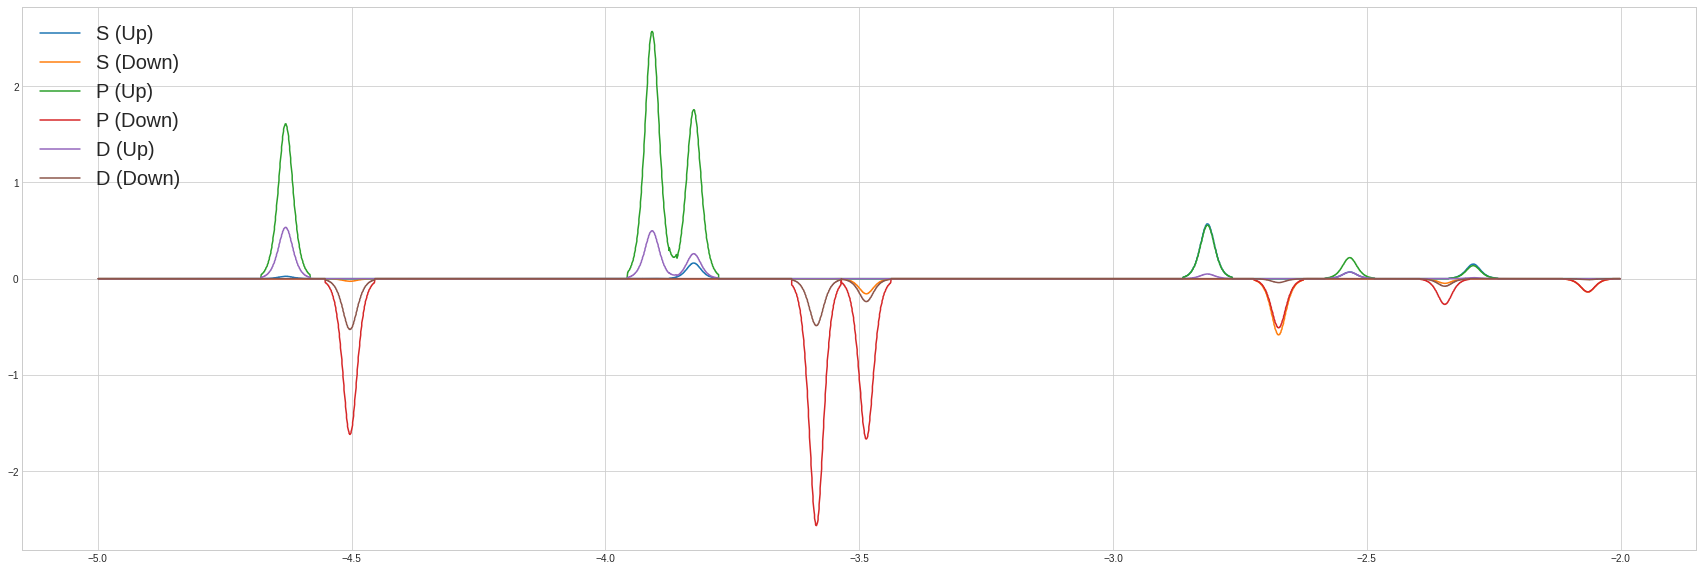

In [ ]:
mag_s = mag_s[mag_s[:,0]>-5]
mag_s = mag_s[mag_s[:,0]<-2]

mag_p = mag_p[mag_p[:,0]>-5]
mag_p = mag_p[mag_p[:,0]<-2]

mag_d = mag_d[mag_d[:,0]>-5]
mag_d = mag_d[mag_d[:,0]<-2]

fig, ax = plt.subplots()
plt.plot(mag_s[:,0],mag_s[:,1], label="S (Up)")
plt.plot(mag_s[:,0],-mag_s[:,2],label="S (Down)")
plt.plot(mag_p[:,0],mag_p[:,1], label="P (Up)")
plt.plot(mag_p[:,0],-mag_p[:,2], label="P (Down)")
plt.plot(mag_d[:,0],mag_d[:,1], label="D (Up)")
plt.plot(mag_d[:,0],-mag_d[:,2], label="D (Down)")
fig.set_size_inches(30, 10)
plt.legend(loc='upper left', fontsize=20)
plt.show()